<a href="https://colab.research.google.com/github/pvbaleeva/skrip/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Task_DataAn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание по анализу данных и визуализации

Этапы работы:
- Выбрать данные, которые вам интересны, предпочтительно в табличной форме (Excel, CSV)
- С помощью Pandas провести какой-то анализ данных и визуализацию
- По возможности стилизовать визуализацию, чтобы получить некоторую консистентную инфографику в оригинальном стиле

### Выбор данных

Рекомендумые ресурсы для поиска данных:
* [Список от Yandex](https://yandex.ru/project/oda/useful)
* [Kaggle](http://Kaggle.com) – сайт соревований для датасайнтистов. Там же можно искать код
* Открытые данные:
  - ищите в интернете по этим ключевым словам
  - https://data.world/datasets/open-data
* Различные текстовые данные, из которых можно извлечь что-то интересное:
  - Видео на YouTube, у которых есть субтитры, или которые можно преобразовать в текст (см. пример)
  - Библиотеки книг: [lib.ru](http://lib.ru), [Project Gutenberg](https://www.gutenberg.org/) и др.
* Статьи:
  - [15 of the Best Free Open Data Sources for 2024](https://careerfoundry.com/en/blog/data-analytics/open-data-sources/)

### Анализ данных

Для анализа данных используем Pandas. Если вы не знаете, как сделать какую-то операцию:
* Ищем в интернет (как правило, хорошие ответы находятся на сайте stackoverflow.com)
* Спрашиваем [у ChatGPT](https://soshnikov.com/ai/how-to-use-chatgpt-ru/)

In [ ]:
import pandas as pd

# df = pd.read_csv(...) # чтение файла CSV, иногда может потребоваться указать разделитель sep=';'
# df = pd.read_excel('titanic.xlsx') # чтение файла Excel

In [ ]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов (если нужно исключить их из анализа)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Загрузка датасета (предположим, что он в формате CSV)
df = pd.read_csv('discog_data.csv')  # Замените на имя вашего файла

# Функция для очистки текста и подсчёта слов
def clean_and_count_words(text):
    # Удаляем знаки препинания и приводим текст к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разделяем текст на слова
    words = text.split()
    # Удаляем стоп-слова
    words = [word for word in words if word not in stop_words]
    return words

# Применяем функцию ко всем текстам песен
all_words = []
for lyrics in df['lyrics']:  # Используем столбец 'lyrics'
    all_words.extend(clean_and_count_words(lyrics))

# Подсчитываем частотность слов
word_freq = Counter(all_words)

# Преобразуем результат в DataFrame для удобства
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Сортируем по частоте
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Выводим топ-20 самых частых слов
print(word_freq_df.head(20))

# Сохраняем результат в CSV (опционально)
word_freq_df.to_csv('kendrick_word_frequency.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


      Word  Frequency
20      im        733
53    like        489
13    dont        379
25    know        375
4    nigga        302
654   fuck        294
26     got        277
24     get        269
199   love        252
150   aint        221
242  bitch        214
216   shit        203
525    one        193
85      go        188
117   life        185
6    thats        183
184    see        173
80    tell        172
179   want        170
128   back        170


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


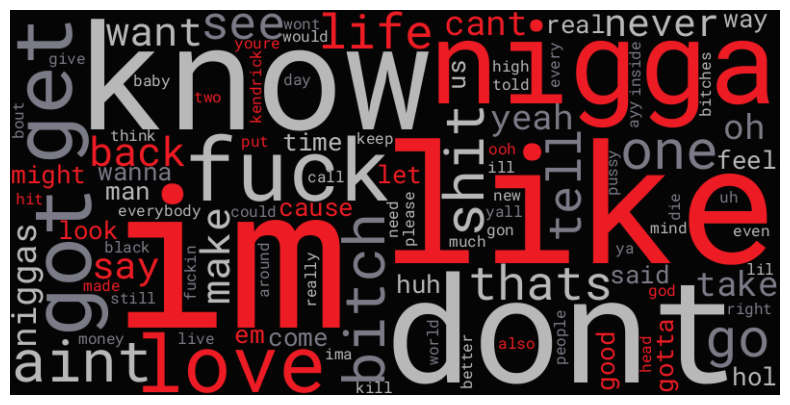

In [17]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from random import choice

# Загружаем стоп-слова
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Загрузка датасета (предположим, что он в формате CSV)
df = pd.read_csv('discog_data.csv')  # Замените на имя вашего файла

# Функция для очистки текста и подсчёта слов
def clean_and_count_words(text):
    # Удаляем знаки препинания и приводим текст к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разделяем текст на слова
    words = text.split()
    # Удаляем стоп-слова
    words = [word for word in words if word not in stop_words]
    return words

# Применяем функцию ко всем текстам песен
all_words = []
for lyrics in df['lyrics']:  # Используем столбец 'lyrics'
    all_words.extend(clean_and_count_words(lyrics))

# Подсчитываем частотность слов
word_freq = Counter(all_words)

# Преобразуем результат в DataFrame для удобства
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Создаем словарь для облака слов
word_freq_dict = dict(word_freq_df.values)

# Пользовательская цветовая функция
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Задаем цвета из вашей палитры
    colors = ['#ED1C24', '#B8B8B9', '#7B7B87']
    return choice(colors)  # Случайно выбираем цвет из списка

# Путь к файлу шрифта Roboto Mono-Regular
font_path = '/content/RobotoMono-Regular.ttf'  # Укажите путь к файлу шрифта

# Создаем облако слов
wordcloud = WordCloud(
    width=800,              # Ширина изображения
    height=400,             # Высота изображения
    background_color='#050505',  # Цвет фона (черный)
    color_func=custom_color_func,  # Пользовательская цветовая функция
    font_path=font_path,    # Используем шрифт Roboto Mono-Regular
    max_words=100           # Максимальное количество слов
).generate_from_frequencies(word_freq_dict)

# Визуализируем облако слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Отключаем оси
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


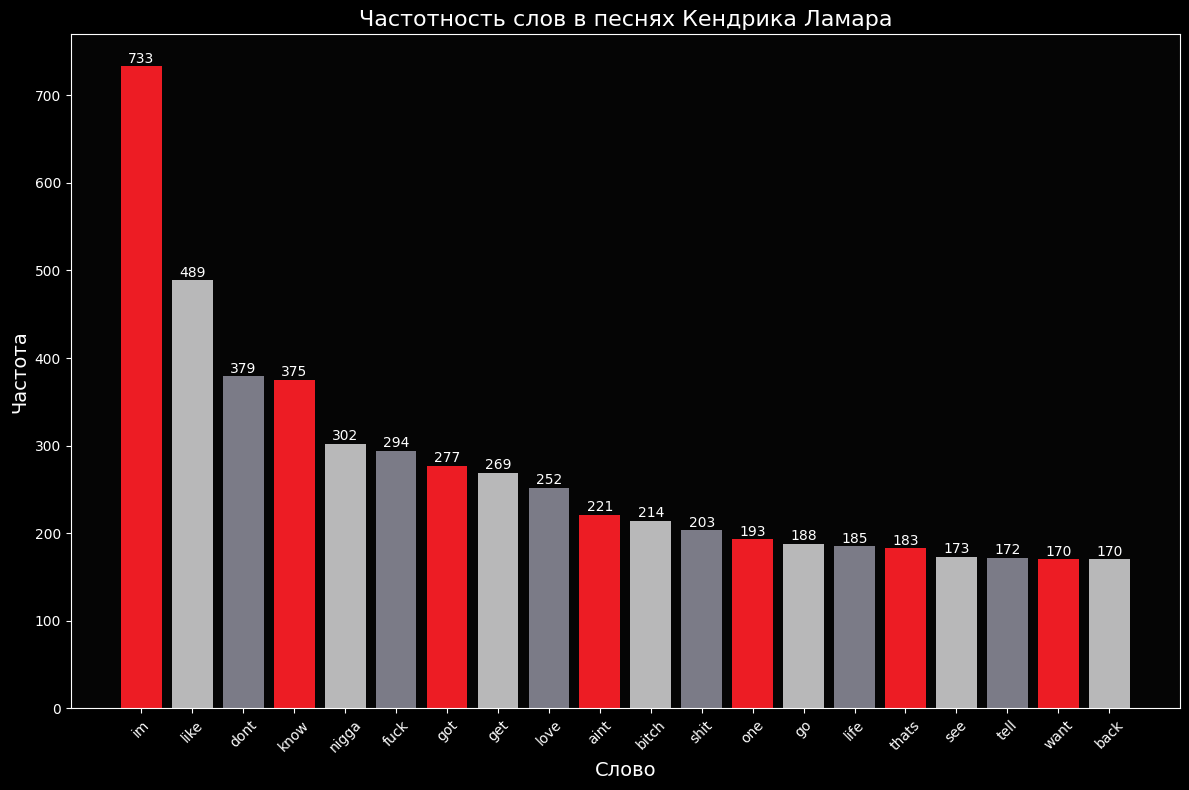

In [28]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv('discog_data.csv')

def clean_and_count_words(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words
all_words = []
for lyrics in df['lyrics']:
    all_words.extend(clean_and_count_words(lyrics))
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
top_words = word_freq_df.head(20)
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.gca().set_facecolor('#050505')
colors = ['#ED1C24', '#B8B8B9', '#7B7B87']
bars = plt.bar(top_words['Word'], top_words['Frequency'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='white',
        fontsize=10)
plt.title('Частотность слов в песнях Кендрика Ламара', fontsize=16, color='white')
plt.xlabel('Слово', fontsize=14, color='white')
plt.ylabel('Частота', fontsize=14, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Загружаем стоп-слова
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Загрузка датасета (предположим, что он в формате CSV)
df = pd.read_csv('discog_data.csv')  # Замените на имя вашего файла

# Функция для очистки текста и подсчёта слов
def clean_and_count_words(text):
    # Удаляем знаки препинания и приводим текст к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Разделяем текст на слова
    words = text.split()
    # Удаляем стоп-слова
    words = [word for word in words if word not in stop_words]
    return words

# Применяем функцию ко всем текстам песен
all_words = []
for lyrics in df['lyrics']:  # Используем столбец 'lyrics'
    all_words.extend(clean_and_count_words(lyrics))

# Подсчитываем частотность слов
word_freq = Counter(all_words)

# Преобразуем результат в DataFrame для удобства
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Сортируем слова по частоте
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Ограничиваем данные топ-20 словами для визуализации
top_words = word_freq_df.head(20)

# Загружаем шрифты RobotoMono-Regular и RobotoMono-Bold
!wget -O RobotoMono-Regular.ttf "https://fonts.google.com/download?family=Roboto%20Mono"
!wget -O RobotoMono-Bold.ttf "https://fonts.google.com/download?family=Roboto%20Mono"

# Добавляем шрифты в matplotlib
font_path_regular = 'RobotoMono-Regular.ttf'
font_path_bold = 'RobotoMono-Bold.ttf'
fm.fontManager.addfont(font_path_regular)
fm.fontManager.addfont(font_path_bold)

# Настройка стиля гистограммы
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')  # Темный фон
plt.gca().set_facecolor('#050505')  # Цвет фона графика

# Цвета для столбцов
colors = ['#ED1C24', '#B8B8B9', '#7B7B87']

# Создаем гистограмму
bars = plt.bar(top_words['Word'], top_words['Frequency'], color=colors)

# Добавляем подписи столбцов (аннотации)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Позиция по X (центр столбца)
        height + 0.5,  # Позиция по Y (выше вершины столбца)
        f'{int(height)}',  # Текст подписи
        ha='center',  # Горизонтальное выравнивание
        va='bottom',  # Вертикальное выравнивание
        color='white',  # Цвет текста
        fontsize=10,
        fontproperties=fm.FontProperties(fname=font_path_regular)  # Используем RobotoMono-Regular
    )

# Настройка заголовка и подписей
plt.title(
    'Top 20 Most Frequent Words in Kendrick Lamar Songs',
    fontsize=16,
    color='white',
    fontproperties=fm.FontProperties(fname=font_path_bold)  # Используем RobotoMono-Bold
)
plt.xlabel('Words', fontsize=14, color='white', fontproperties=fm.FontProperties(fname=font_path_regular))
plt.ylabel('Frequency', fontsize=14, color='white', fontproperties=fm.FontProperties(fname=font_path_regular))

# Настройка цветов осей и меток
plt.xticks(rotation=45, color='white', fontproperties=fm.FontProperties(fname=font_path_regular))  # Поворот подписей по оси X
plt.yticks(color='white', fontproperties=fm.FontProperties(fname=font_path_regular))  # Цвет меток по оси Y

# Отображение гистограммы
plt.tight_layout()  # Улучшает расположение элементов
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--2025-03-19 22:39:57--  https://fonts.google.com/download?family=Roboto%20Mono
Resolving fonts.google.com (fonts.google.com)... 142.250.141.101, 142.250.141.102, 142.250.141.113, ...
Connecting to fonts.google.com (fonts.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘RobotoMono-Regular.ttf’

RobotoMono-Regular.     [ <=>                ] 171.98K  --.-KB/s    in 0.01s   

2025-03-19 22:39:57 (13.7 MB/s) - ‘RobotoMono-Regular.ttf’ saved [176112]

--2025-03-19 22:39:57--  https://fonts.google.com/download?family=Roboto%20Mono
Resolving fonts.google.com (fonts.google.com)... 142.250.141.101, 142.250.141.102, 142.250.141.113, ...
Connecting to fonts.google.com (fonts.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘RobotoMono-Bold.ttf’

RobotoMono-Bold.ttf     [ <=>                ] 171.98K  --.-KB/s    in 0.01s 

RuntimeError: Can not load face (unknown file format; error code 0x2)